<a href="https://colab.research.google.com/github/rithvik2211/Stock-market-prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

In [91]:
from google.colab import userdata
key = userdata.get('tingokey')

In [ ]:
!pip install pandas-datareader


In [92]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
df = pdr.get_data_tiingo('AAPL', api_key = key)#UAA

<ipython-input-95-2fe328918ade>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)#UAA


In [96]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-12-13 00:00:00+00:00  170.95  172.57  169.55  170.49  31897827   
       2018-12-14 00:00:00+00:00  165.48  169.08  165.28  169.00  40703710   
       2018-12-17 00:00:00+00:00  163.94  168.35  162.73  165.45  44287922   
       2018-12-18 00:00:00+00:00  166.07  167.53  164.39  165.38  33841518   
       2018-12-19 00:00:00+00:00  160.89  167.45  159.09  166.00  49047297   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-12-13 00:00:00+00:00  41.018629  41.407341  40.682706  40.908255   
       2018-12-14 00:00:00+00:00  39.706129  40.569932  39.658140  40.550736   
       2018-12-17 00:00:00+00:00  39.336614  40.394772  39.046280  39.698931   
       2018-12-18 00:00:00+00:00  39.847697  40.198017  39.444589  39.682135   
       2018-12-19 00:00:00+00:00  38.604781  40.178821  38.172880  39.830901   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-12-13 00:00:00+00:00  127591308      0.0          1.0  
       2018-12-14 00:00:00+00:00  162814840      0.0          1.0  
       2018-12-17 00:00:00+00:00  177151688      0.0          1.0  
       2018-12-18 00:00:00+00:00  135366072      0.0          1.0  
       2018-12-19 00:00:00+00:00  196189188      0.0          1.0

In [97]:
df.to_csv('drive/MyDrive/Colab Notebooks/FICO1-12-23.csv')

In [ ]:
!cd drive/MyDrive/Colab\ Notebooks


In [98]:
df=  pd.read_csv('drive/MyDrive/Colab Notebooks/FICO1-12-23.csv')

In [99]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-12-13 00:00:00+00:00,170.95,172.57,169.55,170.49,31897827,41.018629,41.407341,40.682706,40.908255,127591308,0.0,1.0
1,AAPL,2018-12-14 00:00:00+00:00,165.48,169.08,165.28,169.00,40703710,39.706129,40.569932,39.658140,40.550736,162814840,0.0,1.0
2,AAPL,2018-12-17 00:00:00+00:00,163.94,168.35,162.73,165.45,44287922,39.336614,40.394772,39.046280,39.698931,177151688,0.0,1.0
3,AAPL,2018-12-18 00:00:00+00:00,166.07,167.53,164.39,165.38,33841518,39.847697,40.198017,39.444589,39.682135,135366072,0.0,1.0
4,AAPL,2018-12-19 00:00:00+00:00,160.89,167.45,159.09,166.00,49047297,38.604781,40.178821,38.172880,39.830901,196189188,0.0,1.0


In [100]:
target = df['close']

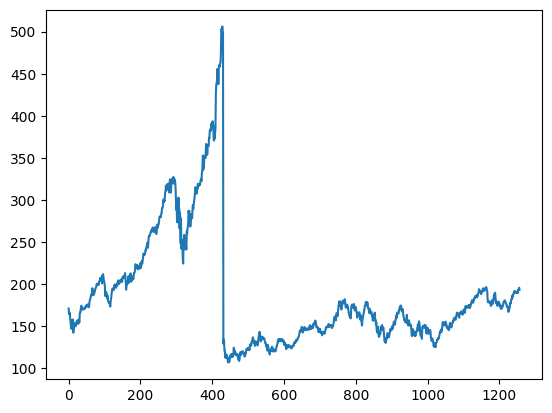

In [101]:
plt.plot(target)

In [102]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
target = scaler.fit_transform(np.array(target).reshape(-1,1))

In [103]:
train_sz = int(len(target)*0.7)
test_sz = len(target)  - train_sz
print(train_sz,test_sz, len(target))

879 378 1257


In [104]:
train_data, test_data = target[0:train_sz,:],target[train_sz:len(target),:]

In [105]:
def create_dataset(data, time_step=1):
  dataX, dataY = [], []
  for i in range(len(data) - time_step-1):
    a = data[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(data[i+time_step,0])
  return np.array(dataX), np.array(dataY)


In [106]:
timestep = 100

X_train , Y_train = create_dataset(train_data,timestep)
X_test , Y_test = create_dataset(test_data,timestep)


In [107]:
X_train.shape

(778, 100)

In [108]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [110]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.fit(X_train,Y_train, validation_data= (X_test, Y_test), epochs= 100, batch_size= 64, verbose =1)

Epoch 1/100
13/13 [==============================] - 6s 137ms/step - loss: 0.0346 - val_loss: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0173 - val_loss: 0.0047
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0111 - val_loss: 3.0119e-04
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0088 - val_loss: 0.0013
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0085 - val_loss: 0.0010
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0079 - val_loss: 8.2439e-04
Epoch 7/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0069 - val_loss: 2.6900e-04
Epoch 8/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0069 - val_loss: 3.8184e-04
Epoch 9/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0061 - val_loss: 2.2104e-04
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - loss: 0.00

In [113]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [114]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [115]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(Y_train,train_predict))

214.1521820437094

In [116]:
sqrt(mean_squared_error(Y_test,test_predict))

166.98056651594993

In [117]:
look_back = 100
trainpredplot = np.empty_like(target)
trainpredplot[:,:] = np.nan
trainpredplot[look_back:len(train_predict)+look_back,:] = train_predict


testpredplot = np.empty_like(target)
testpredplot[:,:] = np.nan
testpredplot[len(train_predict)+(look_back*2)+1:len(target)-1,:] = test_predict

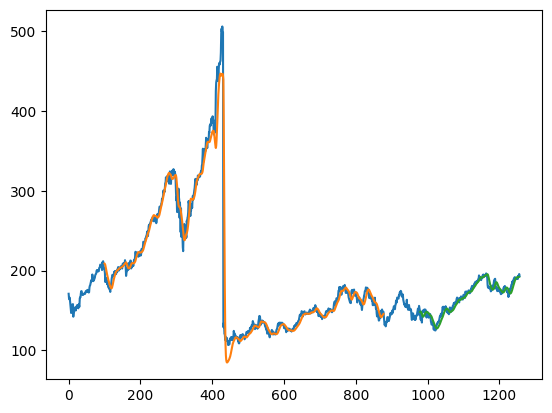

In [118]:
plt.plot(scaler.inverse_transform(target))
plt.plot(trainpredplot)
plt.plot(testpredplot)
plt.show()

In [119]:
len(test_data)

378

In [120]:
x_input = test_data[277:].reshape(1,-1)
x_input.shape
type(x_input)

numpy.ndarray

In [121]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [122]:
len(temp_input)

101

In [123]:
n_steps = 100
i=0
lst_output= []
#x_input = np.asarray(x_input)

while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print('{} day'.format(i))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = model.predict(x_input,verbose =0)
    print('{} day'.format(i))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input =  x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose =0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)


0 day
0 day
101
1 day
1 day
101
2 day
2 day
101
3 day
3 day
101
4 day
4 day
101
5 day
5 day
101
6 day
6 day
101
7 day
7 day
101
8 day
8 day
101
9 day
9 day
101
10 day
10 day
101
11 day
11 day
101
12 day
12 day
101
13 day
13 day
101
14 day
14 day
101
15 day
15 day
101
16 day
16 day
101
17 day
17 day
101
18 day
18 day
101
19 day
19 day
101
20 day
20 day
101
21 day
21 day
101
22 day
22 day
101
23 day
23 day
101
24 day
24 day
101
25 day
25 day
101
26 day
26 day
101
27 day
27 day
101
28 day
28 day
101
29 day
29 day
101
[[0.21602806448936462], [0.2169986367225647], [0.21776941418647766], [0.2183988094329834], [0.21894437074661255], [0.21944746375083923], [0.21993324160575867], [0.22041523456573486], [0.22089973092079163], [0.2213892638683319], [0.22188454866409302], [0.22238558530807495], [0.22289222478866577], [0.22340428829193115], [0.22392159700393677], [0.22444409132003784], [0.2249717116355896], [0.2255043387413025], [0.22604194283485413], [0.22658443450927734], [0.2271316945552826], [0

In [124]:
day_new = np.arange(1,101)
day_pred  = np.arange(101,131)


In [127]:
len(target)

1257

In [125]:
df2 = target.tolist()
df2.extend(lst_output)


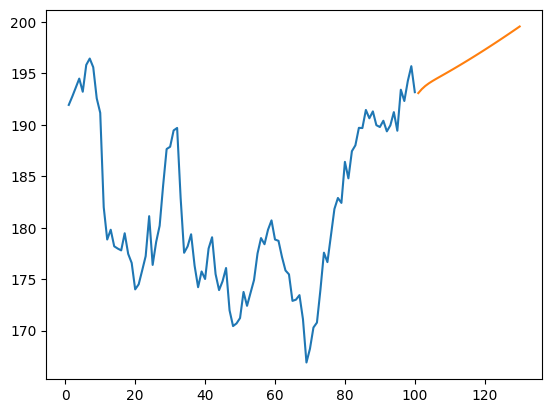

In [128]:
plt.plot(day_new,scaler.inverse_transform(target[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))